### 작성일 : 19/7/30
### 목적 : D1-D15 데이터 컬럼 이해 및 feature engineering 적용 아이디어 찾기

### 0. load libraries and dataset

In [1]:
library(data.table)
library(ggplot2)
library(dplyr)
options(repr.plot.width = 5, repr.plot.height = 3)
options(scipen = 100)
library(ggpubr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: magrittr


In [2]:
tr <- fread("/Users/jeong/downloads/IEEE/input/train_transaction.csv")
te <- fread("/Users/jeong/downloads/IEEE/input/test_transaction.csv")

In [5]:
summary(tr$D1)
summary(tr$D2)
summary(tr$D3)
summary(tr$D4)
summary(tr$D5)
summary(tr$D6)
summary(tr$D7)
summary(tr$D8)
summary(tr$D9)
summary(tr$D10)
summary(tr$D11)
summary(tr$D12)
summary(tr$D13)
summary(tr$D14)
summary(tr$D15)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    0.00    3.00   94.35  122.00  640.00    1269 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0    26.0    97.0   169.6   276.0   640.0  280797 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    1.00    8.00   28.34   27.00  819.00  262878 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   -122       0      26     140     253     869  168922 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    1.00   10.00   42.34   32.00  819.00  309841 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  -83.0     0.0     0.0    69.8    40.0   873.0  517353 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0     0.0     0.0    41.6    17.0   843.0  551623 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0     1.0    37.9   146.1   188.0  1707.8  515614 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0     0.2     0.7     0.6     0.8     1.0  515614 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      0       0      15     124     197     876   76022 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  -53.0     0.0    43.0   146.6   274.0   670.0  279287 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    -83       0       0      54      13     648  525823 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0     0.0     0.0    17.9     0.0   847.0  528588 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -193.0     0.0     0.0    57.7     2.0   878.0  528353 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  -83.0     0.0    52.0   163.7   314.0   879.0   89113 

In [60]:
cor.test(tr$D9, tr$D11)

ERROR: Error in cor.test.default(tr$D9, tr$D11): not enough finite observations


#### D1

Warning message:
“Removed 1269 rows containing non-finite values (stat_bin).”Warning message:
“Removed 1269 rows containing non-finite values (stat_bin).”Warning message:
“Removed 6031 rows containing non-finite values (stat_bin).”

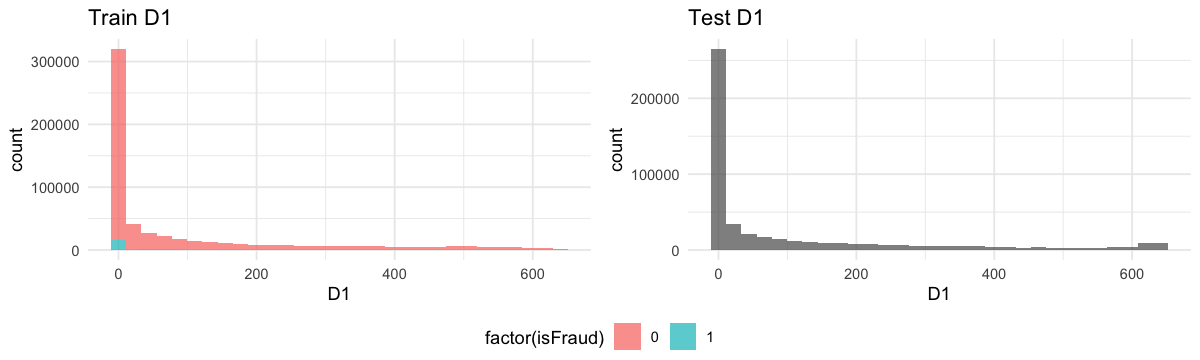

In [6]:
a1  <- ggplot(tr, aes(D1, fill = factor(isFraud))) + geom_histogram(alpha = 0.7, bins = 30)  + theme_minimal() +
    ggtitle("Train D1") + labs(x = "D1") + theme(legend.position = "bottom")

b1 <- ggplot(te, aes(D1)) + geom_histogram(alpha = 0.7, bins = 30)  + theme_minimal() +
    ggtitle("Test D1") + labs(x = "D1")

theme_set(theme_pubr())
options(repr.plot.width = 10, repr.plot.height = 3)
figure <- ggarrange(a1, b1,
                    common.legend = TRUE, legend = "bottom",
                    nrow = 1, ncol = 2)
figure

분포상으로 봤을때 transactionAMT와 비슷하다고 파악

Warning message:
“Removed 1269 rows containing non-finite values (stat_bin).”Warning message:
“Removed 1269 rows containing non-finite values (stat_bin).”Warning message:
“Removed 6031 rows containing non-finite values (stat_bin).”

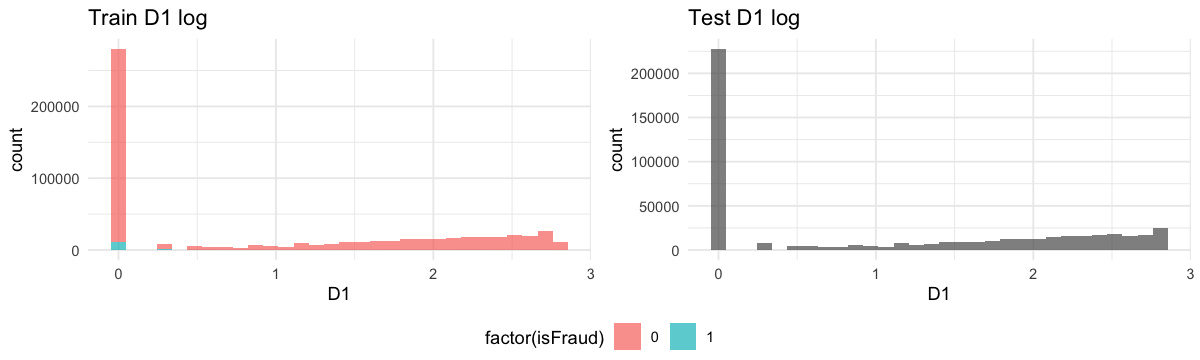

In [13]:
a1  <- ggplot(tr, aes(log10(D1+1), fill = factor(isFraud))) + geom_histogram(alpha = 0.7, bins = 30)  + theme_minimal() +
    ggtitle("Train D1 log") + labs(x = "D1") + theme(legend.position = "bottom")

b1 <- ggplot(te, aes(log10(D1+1))) + geom_histogram(alpha = 0.7, bins = 30)  + theme_minimal() +
    ggtitle("Test D1 log") + labs(x = "D1")

theme_set(theme_pubr())
options(repr.plot.width = 10, repr.plot.height = 3)
figure <- ggarrange(a1, b1,
                    common.legend = TRUE, legend = "bottom",
                    nrow = 1, ncol = 2)
figure

Warning message:
“Removed 1269 rows containing non-finite values (stat_bin).”Warning message:
“Removed 1269 rows containing non-finite values (stat_bin).”

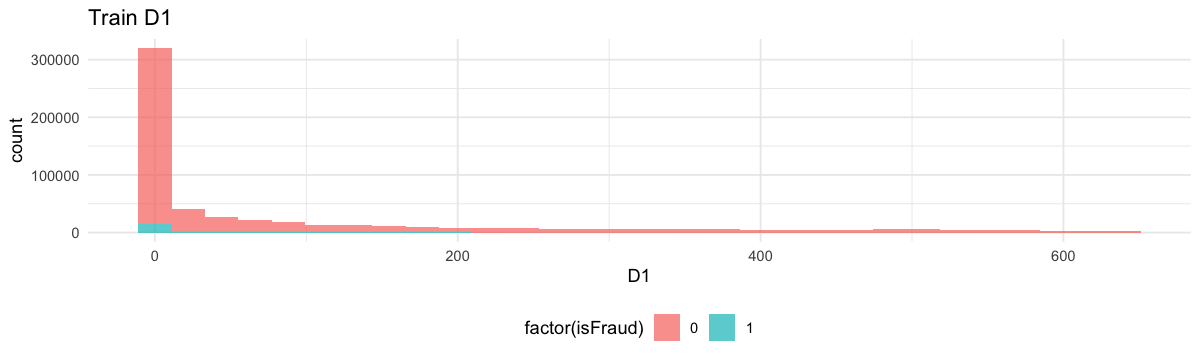

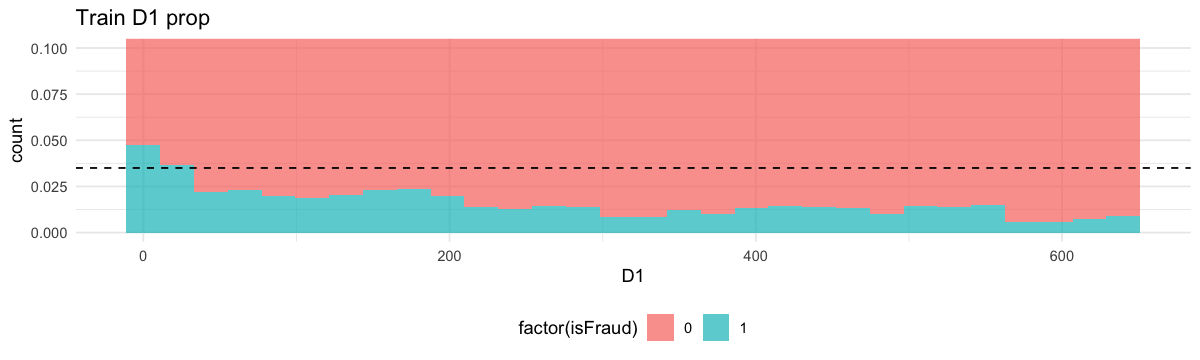

In [20]:
a1  <- ggplot(tr, aes(D1, fill = factor(isFraud))) + geom_histogram(alpha = 0.7, bins = 30)  + theme_minimal() +
    ggtitle("Train D1 ") + labs(x = "D1") + theme(legend.position = "bottom") 
a1  

b1  <- ggplot(tr, aes(D1, fill = factor(isFraud))) + geom_histogram(alpha = 0.7, bins = 30, position = 'fill')  + theme_minimal() +
    ggtitle("Train D1 prop") + labs(x = "D1") + theme(legend.position = "bottom") + coord_cartesian( ylim = c(0, 0.1)) +
geom_hline(yintercept = 0.035, colour="black", linetype="dashed")
b1    

Warning message:
“Removed 280797 rows containing non-finite values (stat_bin).”Warning message:
“Removed 280797 rows containing non-finite values (stat_bin).”

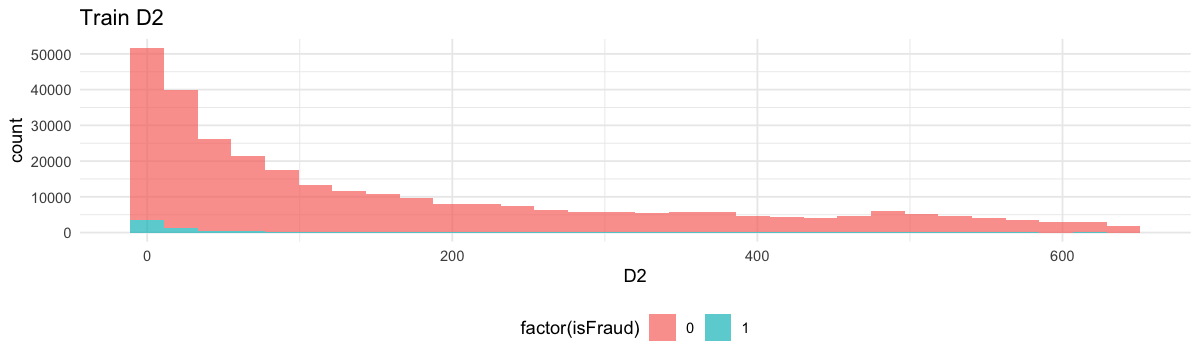

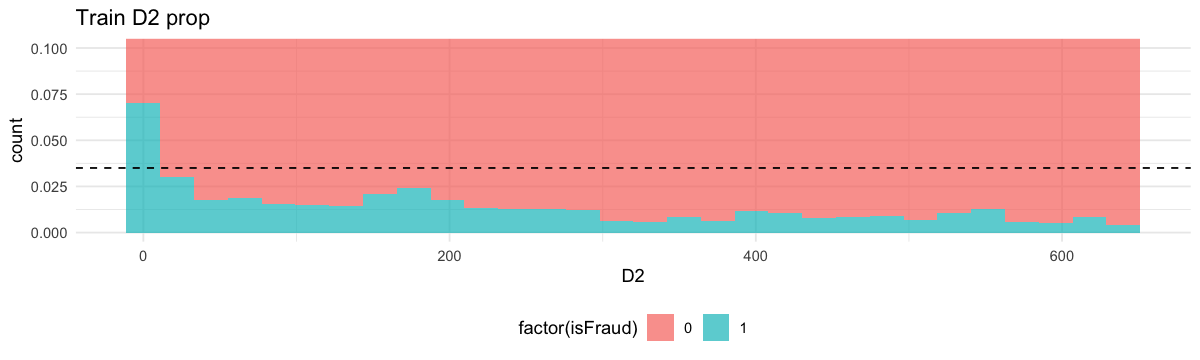

In [21]:
a1  <- ggplot(tr, aes(D2, fill = factor(isFraud))) + geom_histogram(alpha = 0.7, bins = 30)  + theme_minimal() +
    ggtitle("Train D2 ") + labs(x = "D2") + theme(legend.position = "bottom") 
a1  

b1  <- ggplot(tr, aes(D2, fill = factor(isFraud))) + geom_histogram(alpha = 0.7, bins = 30, position = 'fill')  + theme_minimal() +
    ggtitle("Train D2 prop") + labs(x = "D2") + theme(legend.position = "bottom") + coord_cartesian( ylim = c(0, 0.1)) +
geom_hline(yintercept = 0.035, colour="black", linetype="dashed")
b1  

Warning message:
“Removed 262878 rows containing non-finite values (stat_bin).”Warning message:
“Removed 262878 rows containing non-finite values (stat_bin).”

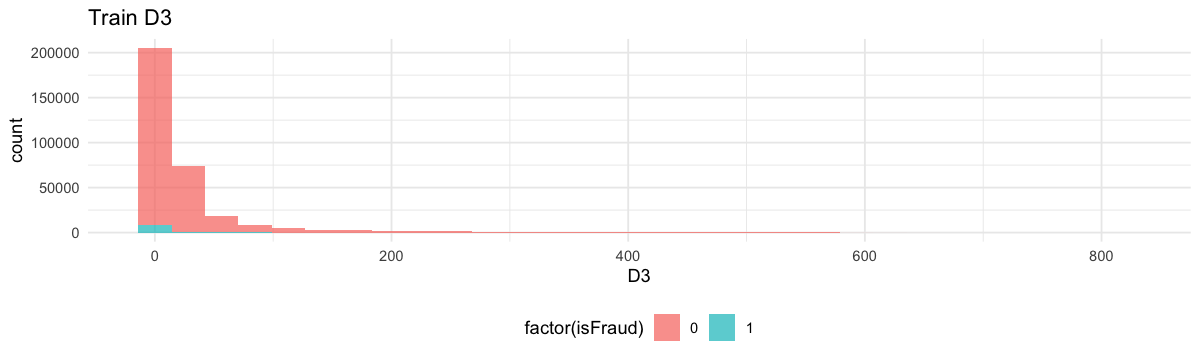

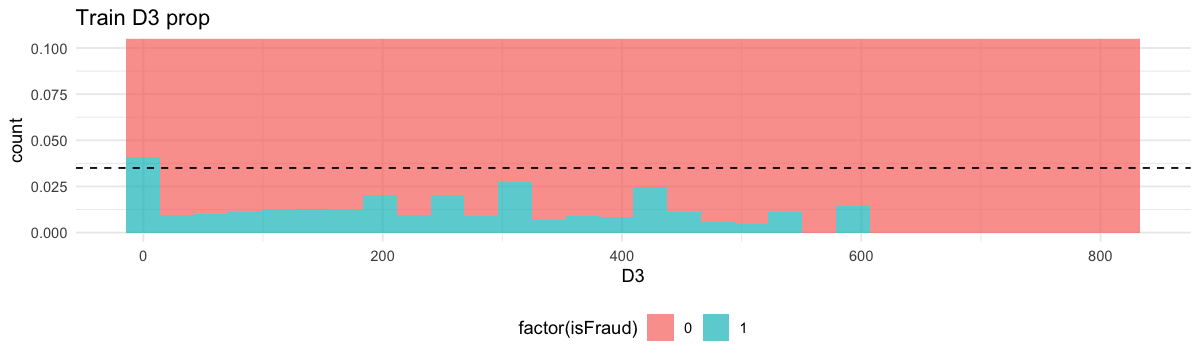

In [22]:
a1  <- ggplot(tr, aes(D3, fill = factor(isFraud))) + geom_histogram(alpha = 0.7, bins = 30)  + theme_minimal() +
    ggtitle("Train D3 ") + labs(x = "D3") + theme(legend.position = "bottom") 
a1  

b1  <- ggplot(tr, aes(D3, fill = factor(isFraud))) + geom_histogram(alpha = 0.7, bins = 30, position = 'fill')  + theme_minimal() +
    ggtitle("Train D3 prop") + labs(x = "D3") + theme(legend.position = "bottom") + coord_cartesian( ylim = c(0, 0.1)) +
geom_hline(yintercept = 0.035, colour="black", linetype="dashed")
b1  

Warning message:
“Removed 168922 rows containing non-finite values (stat_bin).”Warning message:
“Removed 168922 rows containing non-finite values (stat_bin).”

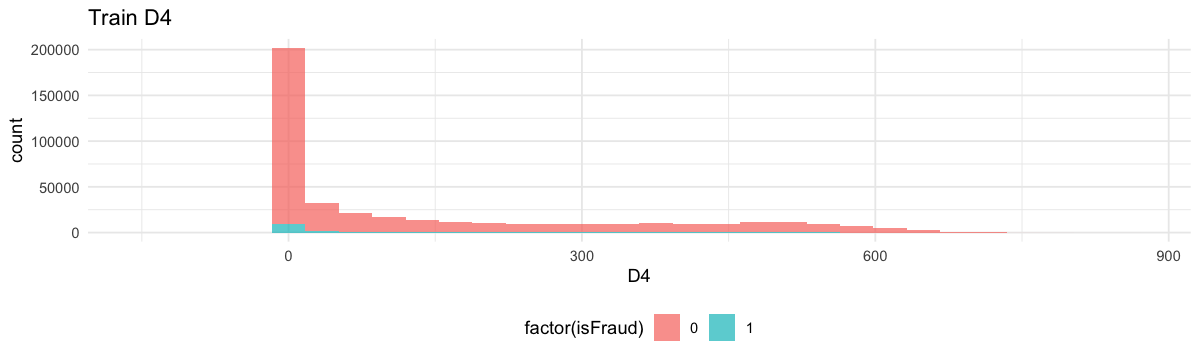

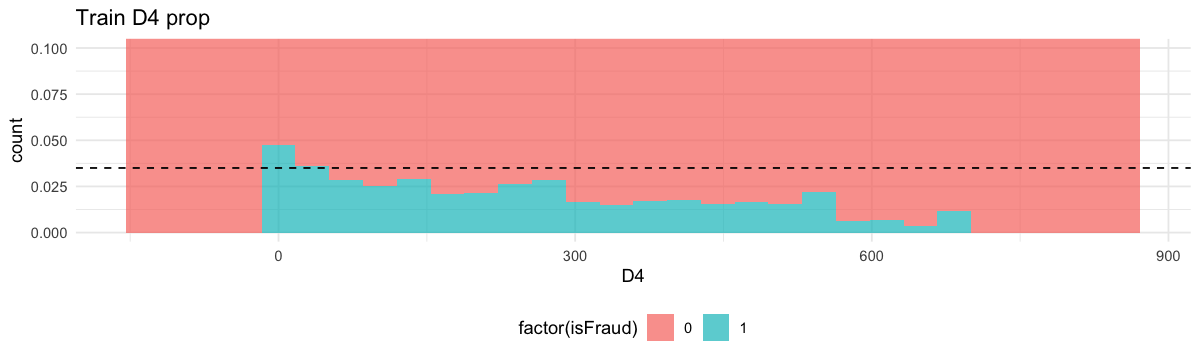

In [23]:
a1  <- ggplot(tr, aes(D4, fill = factor(isFraud))) + geom_histogram(alpha = 0.7, bins = 30)  + theme_minimal() +
    ggtitle("Train D4 ") + labs(x = "D4") + theme(legend.position = "bottom") 
a1  

b1  <- ggplot(tr, aes(D4, fill = factor(isFraud))) + geom_histogram(alpha = 0.7, bins = 30, position = 'fill')  + theme_minimal() +
    ggtitle("Train D4 prop") + labs(x = "D4") + theme(legend.position = "bottom") + coord_cartesian( ylim = c(0, 0.1)) +
geom_hline(yintercept = 0.035, colour="black", linetype="dashed")
b1  

Warning message:
“Removed 309841 rows containing non-finite values (stat_bin).”Warning message:
“Removed 309841 rows containing non-finite values (stat_bin).”

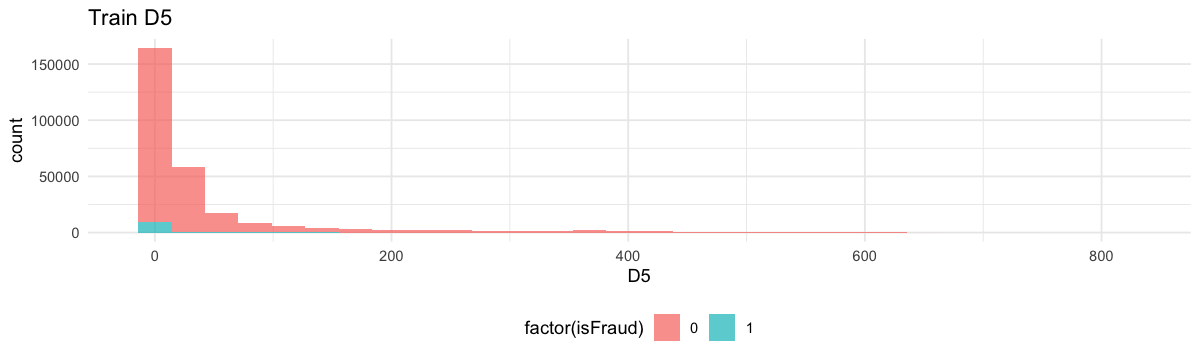

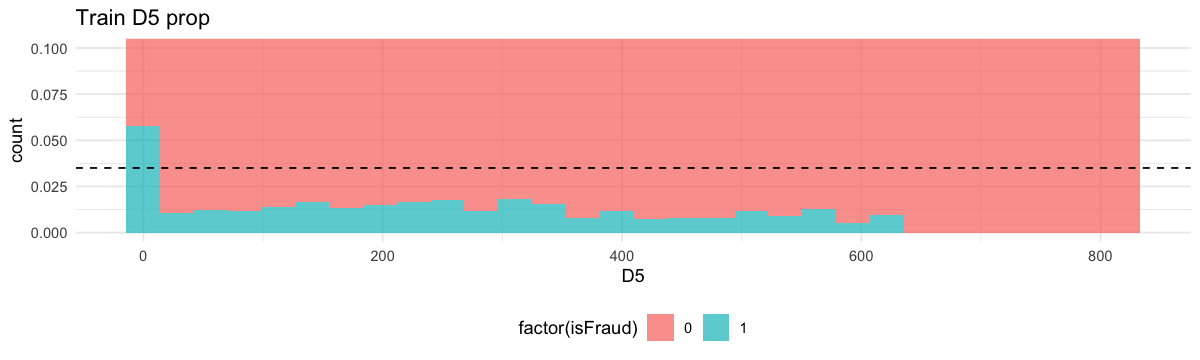

In [24]:
a1  <- ggplot(tr, aes(D5, fill = factor(isFraud))) + geom_histogram(alpha = 0.7, bins = 30)  + theme_minimal() +
    ggtitle("Train D5 ") + labs(x = "D5") + theme(legend.position = "bottom") 
a1  

b1  <- ggplot(tr, aes(D5, fill = factor(isFraud))) + geom_histogram(alpha = 0.7, bins = 30, position = 'fill')  + theme_minimal() +
    ggtitle("Train D5 prop") + labs(x = "D5") + theme(legend.position = "bottom") + coord_cartesian( ylim = c(0, 0.1)) +
geom_hline(yintercept = 0.035, colour="black", linetype="dashed")
b1  

Warning message:
“Removed 517353 rows containing non-finite values (stat_bin).”Warning message:
“Removed 517353 rows containing non-finite values (stat_bin).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”

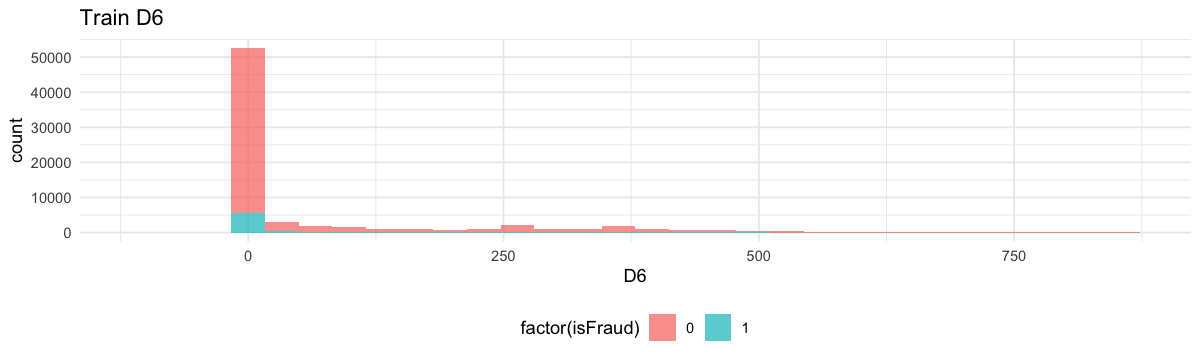

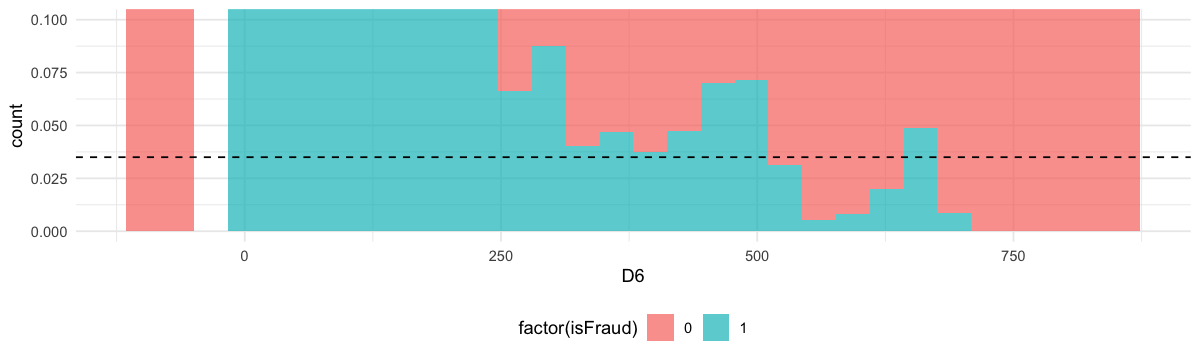

In [26]:
a1  <- ggplot(tr, aes(D6, fill = factor(isFraud))) + geom_histogram(alpha = 0.7, bins = 30)  + theme_minimal() +
    ggtitle("Train D6 ")  + theme(legend.position = "bottom") 
a1  

b1  <- ggplot(tr, aes(D6, fill = factor(isFraud))) + geom_histogram(alpha = 0.7, bins = 30, position = 'fill')  + theme_minimal() +
      theme(legend.position = "bottom") + coord_cartesian( ylim = c(0, 0.1)) +
geom_hline(yintercept = 0.035, colour="black", linetype="dashed")
b1  

Warning message:
“Removed 551623 rows containing non-finite values (stat_bin).”Warning message:
“Removed 551623 rows containing non-finite values (stat_bin).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”

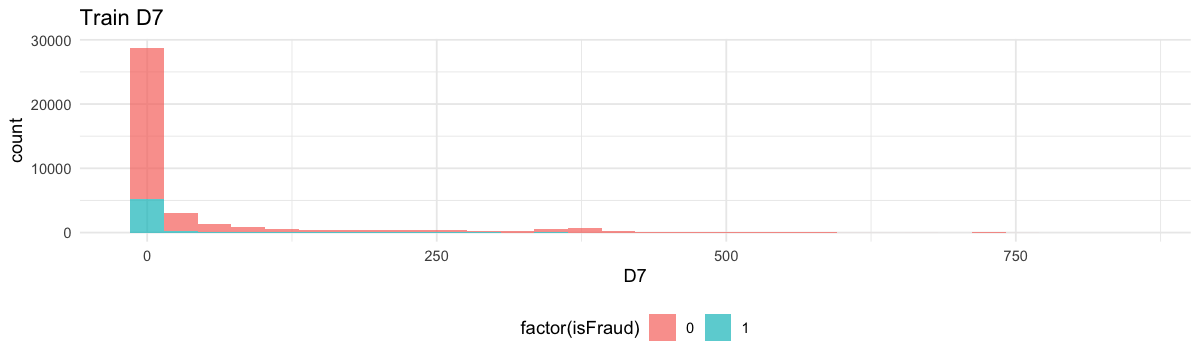

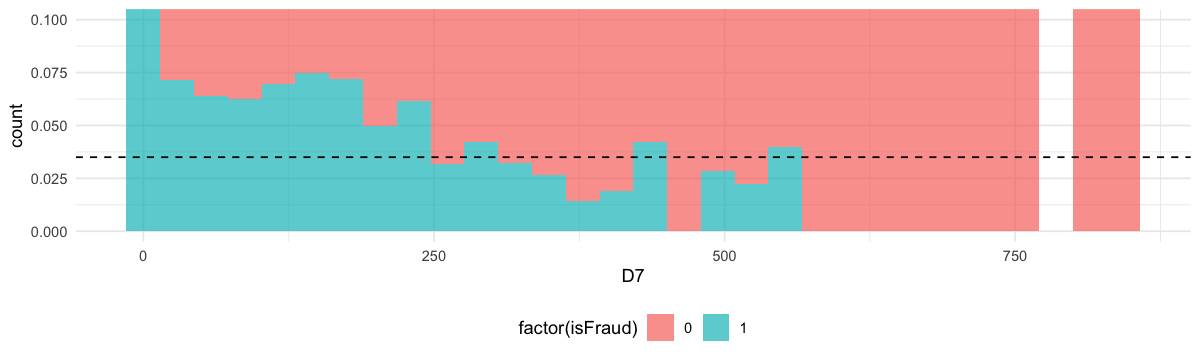

In [27]:
a1  <- ggplot(tr, aes(D7, fill = factor(isFraud))) + geom_histogram(alpha = 0.7, bins = 30)  + theme_minimal() +
    ggtitle("Train D7 ")  + theme(legend.position = "bottom") 
a1  

b1  <- ggplot(tr, aes(D7, fill = factor(isFraud))) + geom_histogram(alpha = 0.7, bins = 30, position = 'fill')  + theme_minimal() +
      theme(legend.position = "bottom") + coord_cartesian( ylim = c(0, 0.1)) +
geom_hline(yintercept = 0.035, colour="black", linetype="dashed")
b1  

Warning message:
“Removed 515614 rows containing non-finite values (stat_bin).”Warning message:
“Removed 515614 rows containing non-finite values (stat_bin).”Warning message:
“Removed 6 rows containing missing values (geom_bar).”

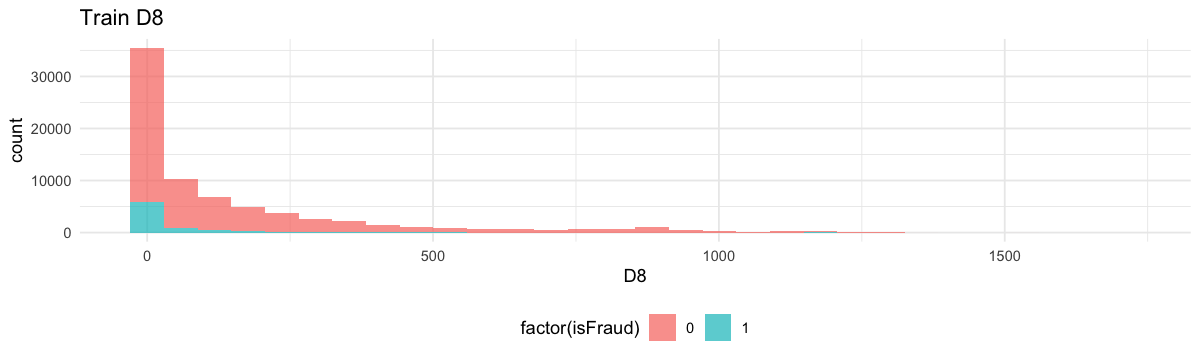

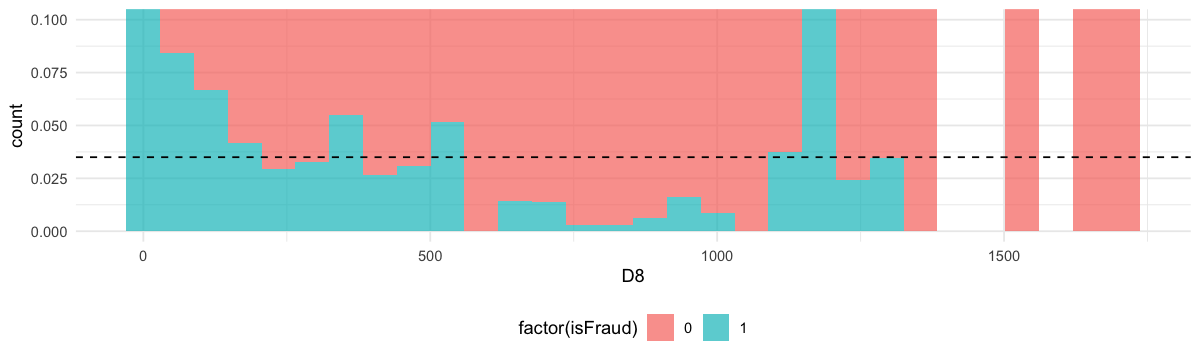

In [28]:
a1  <- ggplot(tr, aes(D8, fill = factor(isFraud))) + geom_histogram(alpha = 0.7, bins = 30)  + theme_minimal() +
    ggtitle("Train D8 ")  + theme(legend.position = "bottom") 
a1  

b1  <- ggplot(tr, aes(D8, fill = factor(isFraud))) + geom_histogram(alpha = 0.7, bins = 30, position = 'fill')  + theme_minimal() +
      theme(legend.position = "bottom") + coord_cartesian( ylim = c(0, 0.1)) +
geom_hline(yintercept = 0.035, colour="black", linetype="dashed")
b1  

Warning message:
“Removed 515614 rows containing non-finite values (stat_bin).”Warning message:
“Removed 515614 rows containing non-finite values (stat_bin).”Warning message:
“Removed 12 rows containing missing values (geom_bar).”

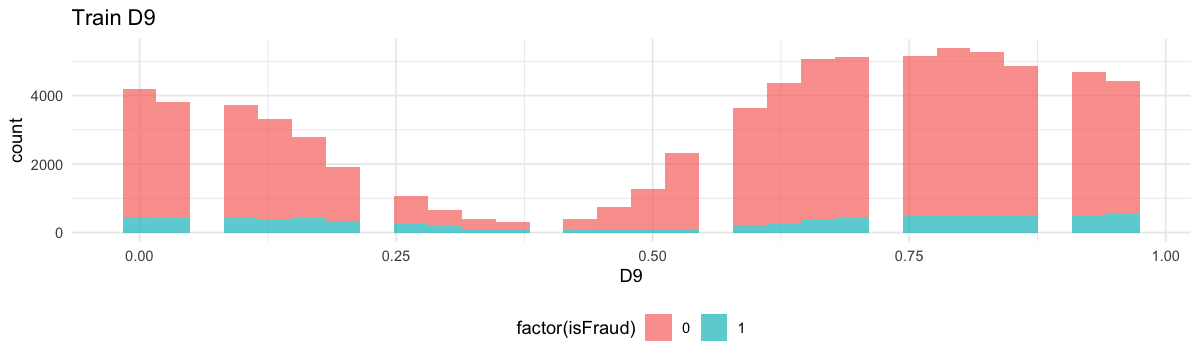

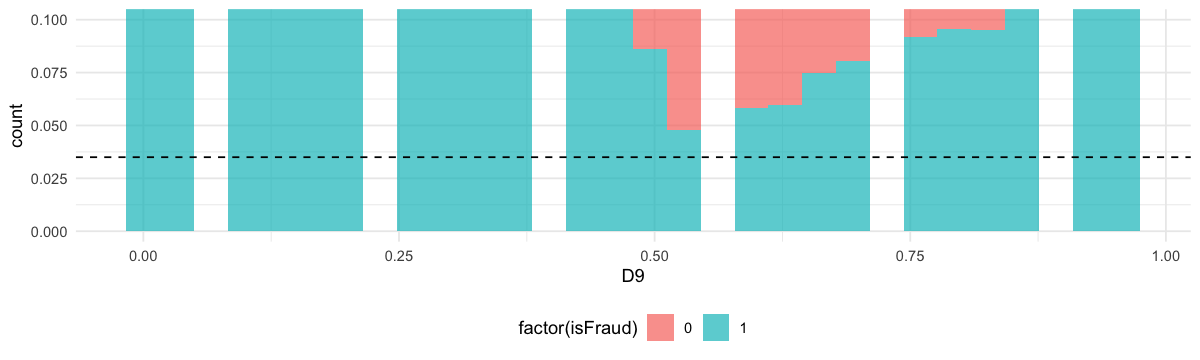

In [29]:
a1  <- ggplot(tr, aes(D9, fill = factor(isFraud))) + geom_histogram(alpha = 0.7, bins = 30)  + theme_minimal() +
    ggtitle("Train D9 ")  + theme(legend.position = "bottom") 
a1  

b1  <- ggplot(tr, aes(D9, fill = factor(isFraud))) + geom_histogram(alpha = 0.7, bins = 30, position = 'fill')  + theme_minimal() +
      theme(legend.position = "bottom") + coord_cartesian( ylim = c(0, 0.1)) +
geom_hline(yintercept = 0.035, colour="black", linetype="dashed")
b1 

Warning message:
“Removed 76022 rows containing non-finite values (stat_bin).”Warning message:
“Removed 76022 rows containing non-finite values (stat_bin).”

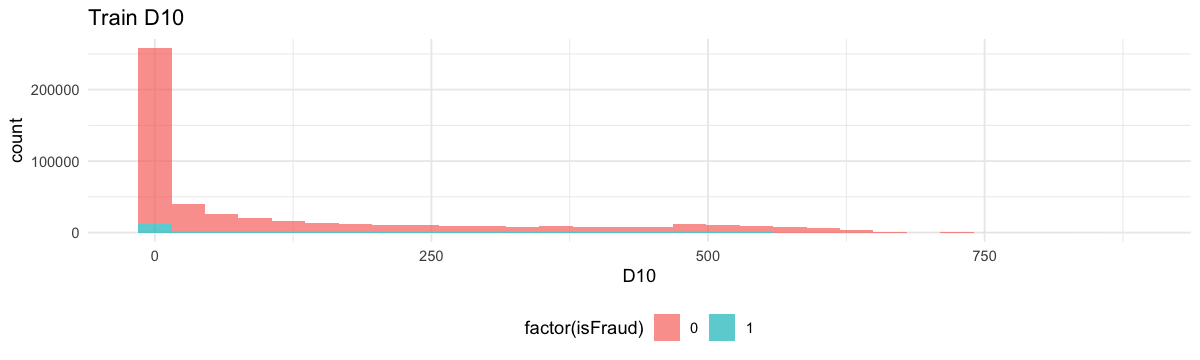

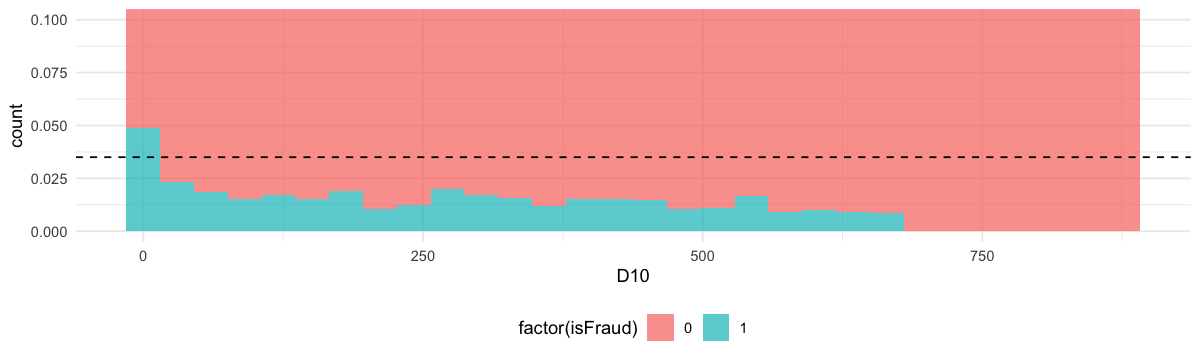

In [30]:
a1  <- ggplot(tr, aes(D10, fill = factor(isFraud))) + geom_histogram(alpha = 0.7, bins = 30)  + theme_minimal() +
    ggtitle("Train D10 ")  + theme(legend.position = "bottom") 
a1  

b1  <- ggplot(tr, aes(D10, fill = factor(isFraud))) + geom_histogram(alpha = 0.7, bins = 30, position = 'fill')  + theme_minimal() +
      theme(legend.position = "bottom") + coord_cartesian( ylim = c(0, 0.1)) +
geom_hline(yintercept = 0.035, colour="black", linetype="dashed")
b1 

Warning message:
“Removed 279287 rows containing non-finite values (stat_bin).”Warning message:
“Removed 279287 rows containing non-finite values (stat_bin).”

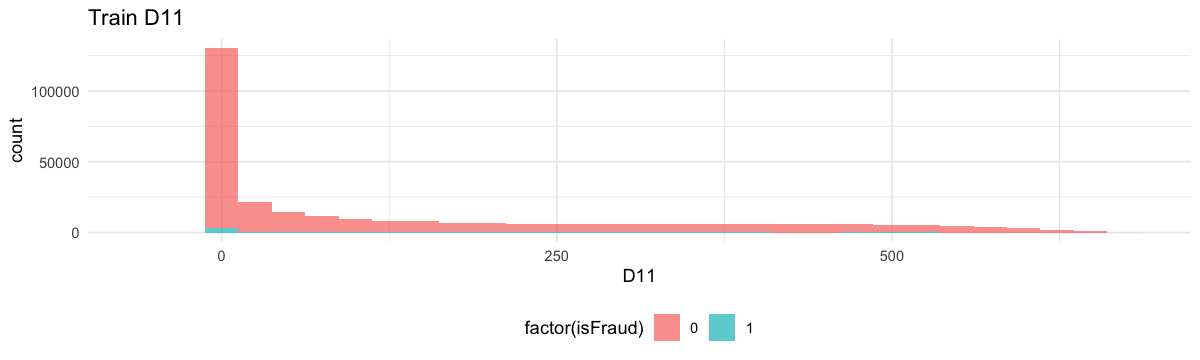

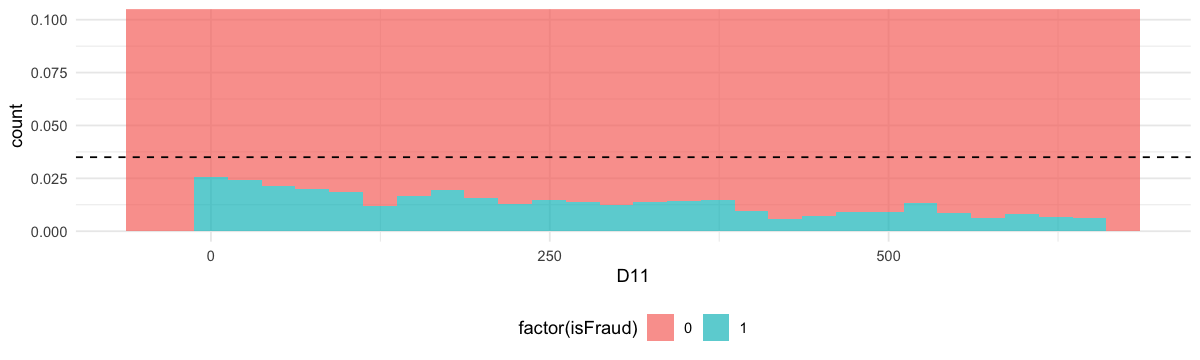

In [31]:
a1  <- ggplot(tr, aes(D11, fill = factor(isFraud))) + geom_histogram(alpha = 0.7, bins = 30)  + theme_minimal() +
    ggtitle("Train D11 ")  + theme(legend.position = "bottom") 
a1  

b1  <- ggplot(tr, aes(D11, fill = factor(isFraud))) + geom_histogram(alpha = 0.7, bins = 30, position = 'fill')  + theme_minimal() +
      theme(legend.position = "bottom") + coord_cartesian( ylim = c(0, 0.1)) +
geom_hline(yintercept = 0.035, colour="black", linetype="dashed")
b1 

Warning message:
“Removed 525823 rows containing non-finite values (stat_bin).”Warning message:
“Removed 525823 rows containing non-finite values (stat_bin).”Warning message:
“Removed 4 rows containing missing values (geom_bar).”

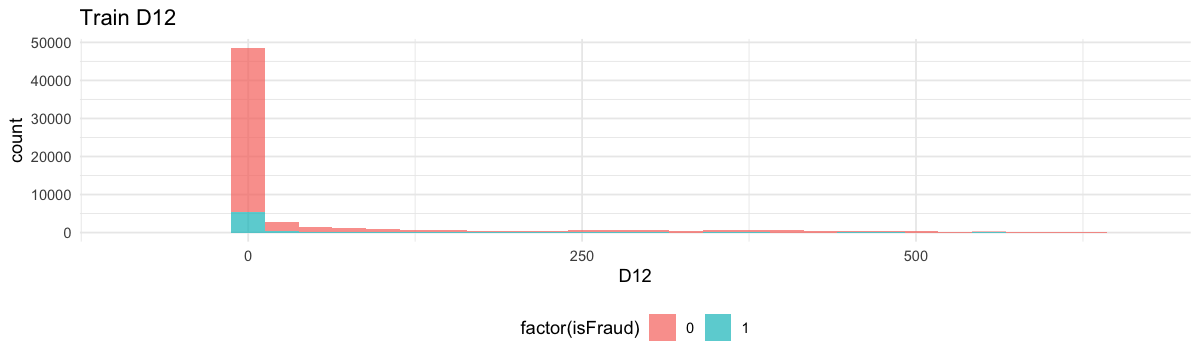

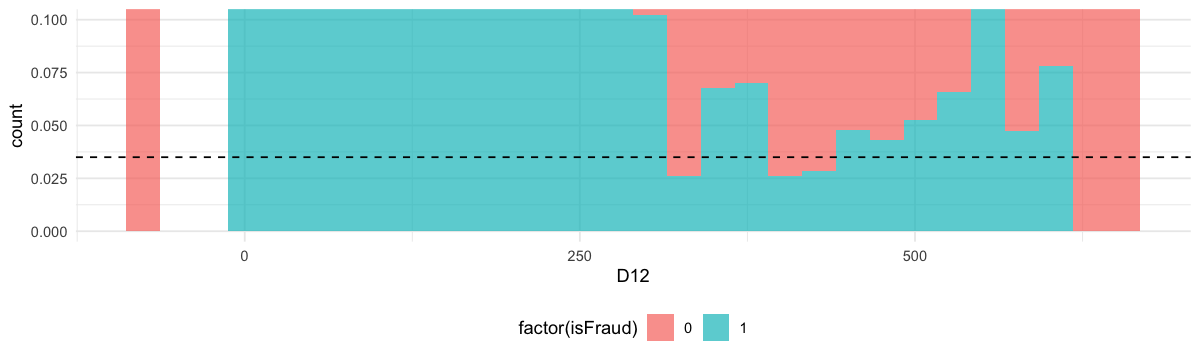

In [32]:
a1  <- ggplot(tr, aes(D12, fill = factor(isFraud))) + geom_histogram(alpha = 0.7, bins = 30)  + theme_minimal() +
    ggtitle("Train D12 ")  + theme(legend.position = "bottom") 
a1  

b1  <- ggplot(tr, aes(D12, fill = factor(isFraud))) + geom_histogram(alpha = 0.7, bins = 30, position = 'fill')  + theme_minimal() +
      theme(legend.position = "bottom") + coord_cartesian( ylim = c(0, 0.1)) +
geom_hline(yintercept = 0.035, colour="black", linetype="dashed")
b1 

Warning message:
“Removed 528588 rows containing non-finite values (stat_bin).”Warning message:
“Removed 528588 rows containing non-finite values (stat_bin).”

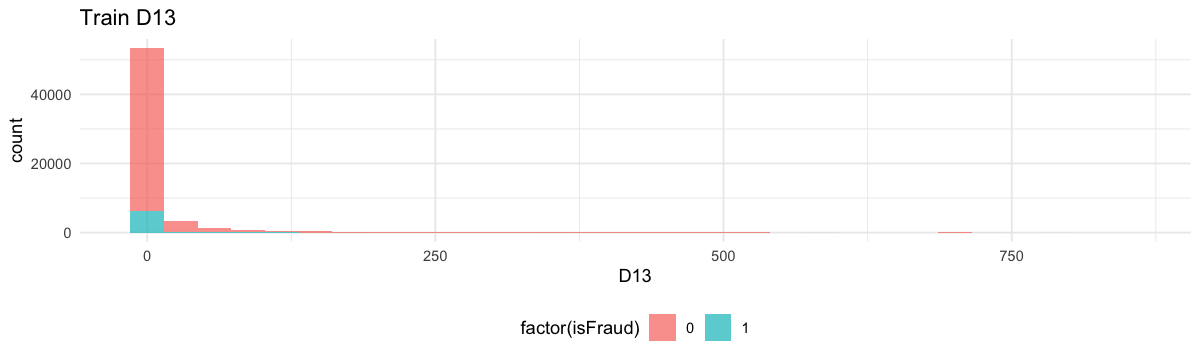

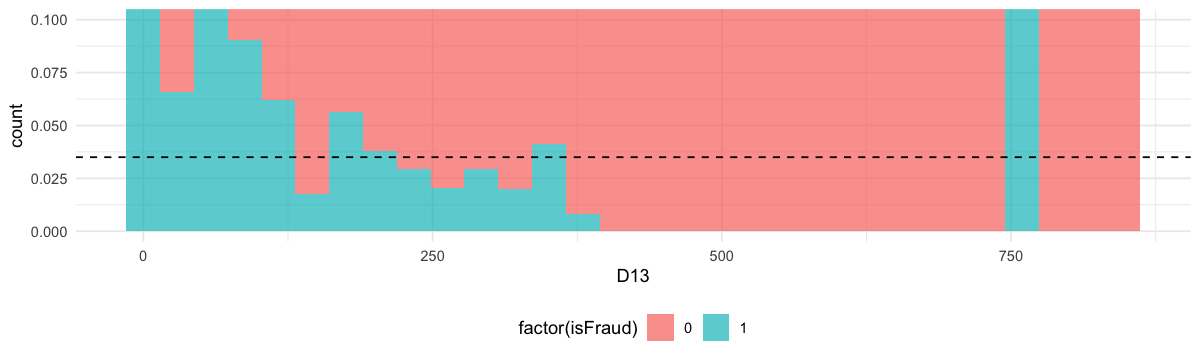

In [33]:
a1  <- ggplot(tr, aes(D13, fill = factor(isFraud))) + geom_histogram(alpha = 0.7, bins = 30)  + theme_minimal() +
    ggtitle("Train D13 ")  + theme(legend.position = "bottom") 
a1  

b1  <- ggplot(tr, aes(D13, fill = factor(isFraud))) + geom_histogram(alpha = 0.7, bins = 30, position = 'fill')  + theme_minimal() +
      theme(legend.position = "bottom") + coord_cartesian( ylim = c(0, 0.1)) +
geom_hline(yintercept = 0.035, colour="black", linetype="dashed")
b1 

Warning message:
“Removed 528353 rows containing non-finite values (stat_bin).”Warning message:
“Removed 528353 rows containing non-finite values (stat_bin).”Warning message:
“Removed 6 rows containing missing values (geom_bar).”

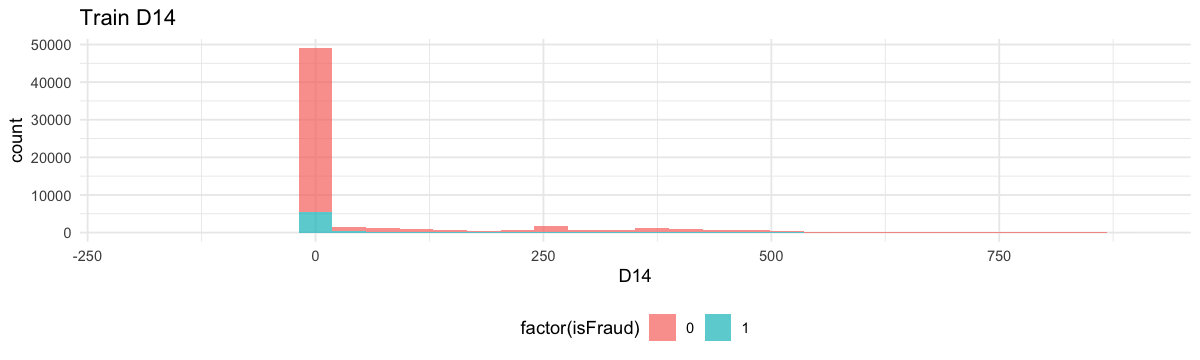

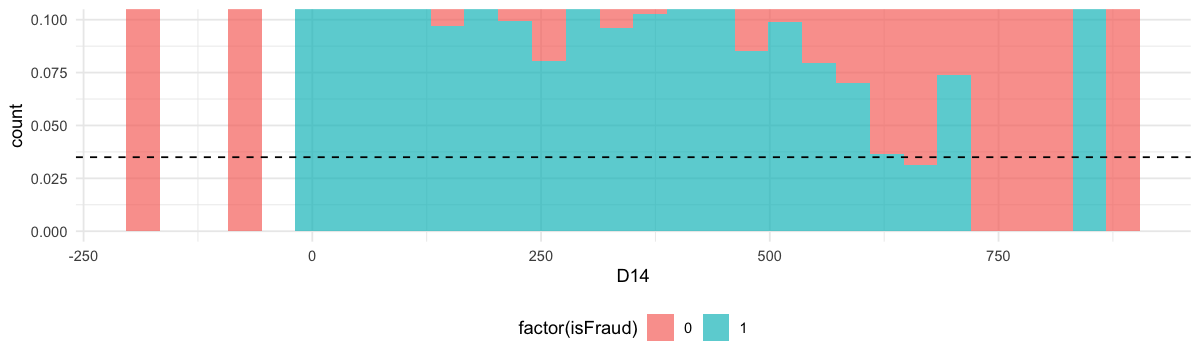

In [34]:
a1  <- ggplot(tr, aes(D14, fill = factor(isFraud))) + geom_histogram(alpha = 0.7, bins = 30)  + theme_minimal() +
    ggtitle("Train D14 ")  + theme(legend.position = "bottom") 
a1  

b1  <- ggplot(tr, aes(D14, fill = factor(isFraud))) + geom_histogram(alpha = 0.7, bins = 30, position = 'fill')  + theme_minimal() +
      theme(legend.position = "bottom") + coord_cartesian( ylim = c(0, 0.1)) +
geom_hline(yintercept = 0.035, colour="black", linetype="dashed")
b1 

Warning message:
“Removed 89113 rows containing non-finite values (stat_bin).”Warning message:
“Removed 89113 rows containing non-finite values (stat_bin).”

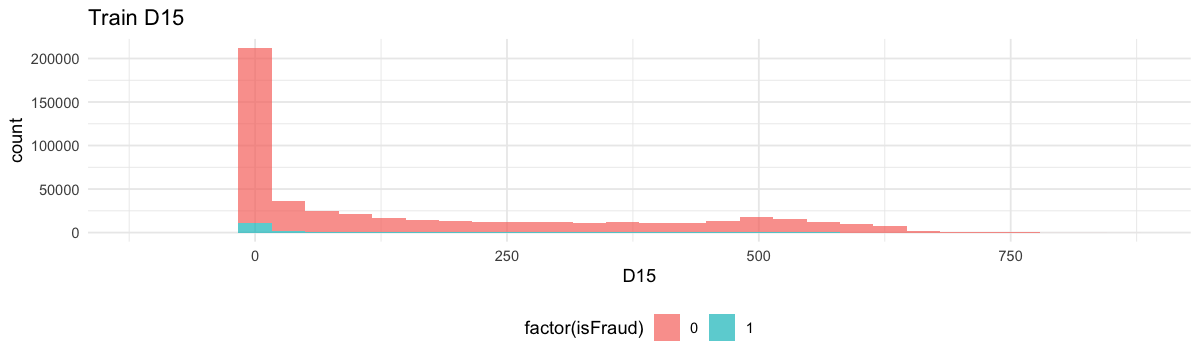

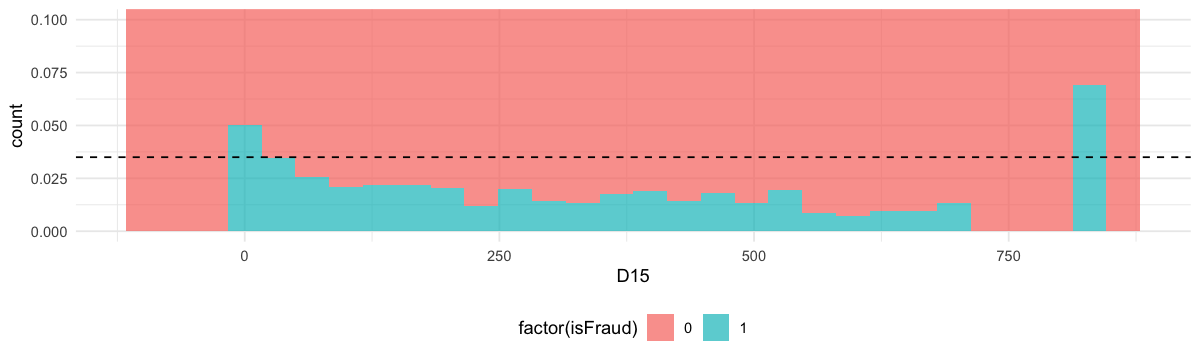

In [35]:
a1  <- ggplot(tr, aes(D15, fill = factor(isFraud))) + geom_histogram(alpha = 0.7, bins = 30)  + theme_minimal() +
    ggtitle("Train D15 ")  + theme(legend.position = "bottom") 
a1  

b1  <- ggplot(tr, aes(D15, fill = factor(isFraud))) + geom_histogram(alpha = 0.7, bins = 30, position = 'fill')  + theme_minimal() +
      theme(legend.position = "bottom") + coord_cartesian( ylim = c(0, 0.1)) +
geom_hline(yintercept = 0.035, colour="black", linetype="dashed")
b1 

- 

In [37]:
nrow(tr)

[1] 590540

In [38]:
515614+76022

[1] 591636